# Aparupa Mitra

# Task 3 ,Data Science & Business Analytics Internship ,The Sparks Foundation

# Exploratory Data Analysis - IPL Sports (Level - Advance)

In [327]:
# MAJOR STEPS INVOLVE IN THIS PROCESS

# 1. DATA RETRIEVAL 

# 2. DATA PREPROCESSING 

# 3. DATA EXPLORATION


In [328]:
# import all packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [329]:
# DATA RETRIEVAL

#Load dataset 

delivery= pd.read_csv("deliveries.CSV" ,encoding ='ISO-8859-1' ,error_bad_lines=False )

delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [330]:
#Load dataset 

matches= pd.read_csv("matches.CSV" ,encoding ='ISO-8859-1' ,error_bad_lines=False)

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [331]:
# DATA PREPROCESSING inclues checking of missing values

delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [332]:
# Since last 3 columns have maximum missing values so instead of filling anything , we are dropping those columns assuming it would not impact the dataset

delivery.drop(columns=['player_dismissed', 'dismissal_kind' ,'fielder'])

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2


In [333]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [334]:
# Since last 3 columns have maximum missing values so instead of filling anything , we are dropping those columns assuming it would not impact the dataset

matches.drop(columns=['umpire1', 'umpire2' ,'umpire3'])

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [335]:
# DESCRIPTIVE STATISTICS

In [336]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [337]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


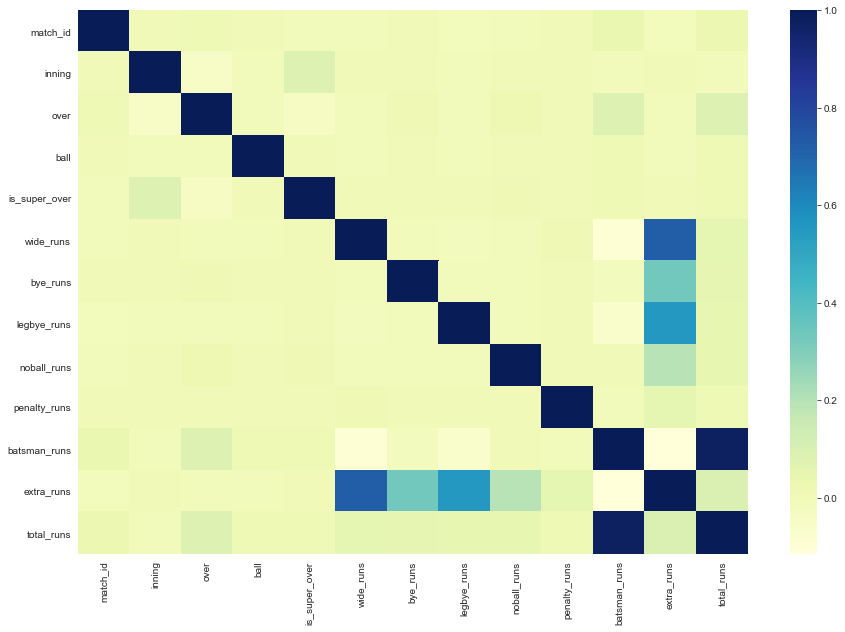

In [338]:
# Find correlation

fig, ax = plt.subplots(figsize=(15,10) ) 
sns.heatmap(delivery.corr(),ax=ax ,cmap="YlGnBu")

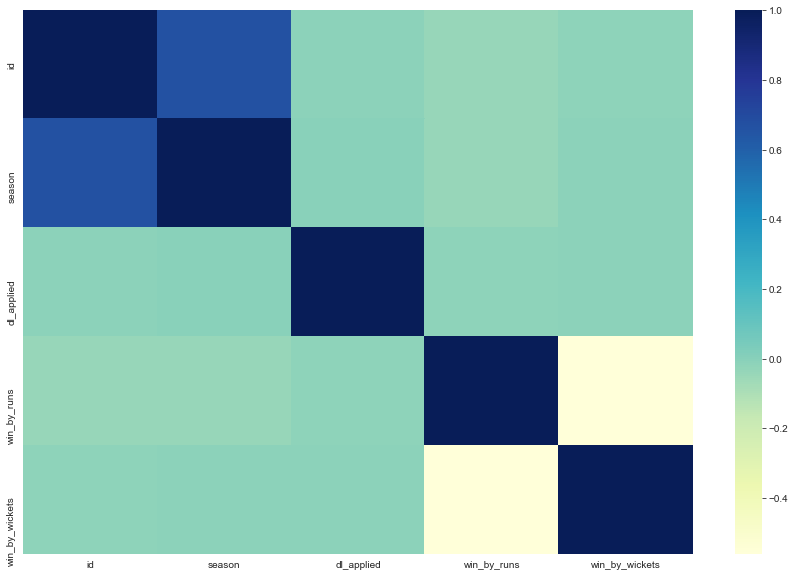

In [339]:
# Find correlation

fig, ax = plt.subplots(figsize=(15,10) ) 
sns.heatmap(matches.corr(),ax=ax ,cmap="YlGnBu")

In [340]:
# VISUALIZATION


In [341]:

df = matches[['city','date','winner','player_of_match']]
df

,city,date,winner,player_of_match
0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Yuvraj Singh
1,Pune,2017-04-06,Rising Pune Supergiant,SPD Smith
2,Rajkot,2017-04-07,Kolkata Knight Riders,CA Lynn
3,Indore,2017-04-08,Kings XI Punjab,GJ Maxwell
4,Bangalore,2017-04-08,Royal Challengers Bangalore,KM Jadhav
...,...,...,...,...
751,Mumbai,05/05/19,Mumbai Indians,HH Pandya
752,Chennai,07/05/19,Mumbai Indians,AS Yadav
753,Visakhapatnam,08/05/19,Delhi Capitals,RR Pant
754,Visakhapatnam,10/05/19,Chennai Super Kings,F du Plessis


In [342]:
# VISUALIZATION 1

# 1. Find out teams with highest number of wins that is which team won maximum number of times


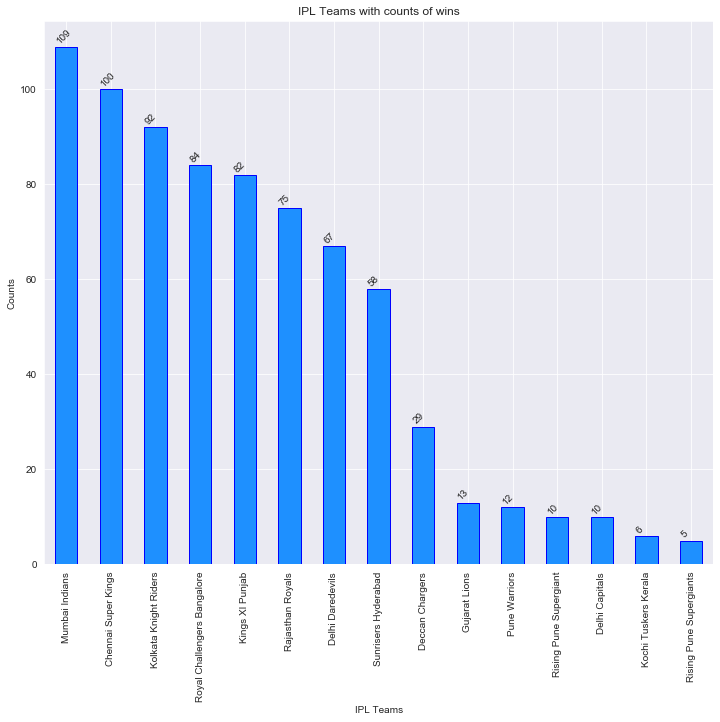

In [343]:


ax =df['winner'].value_counts().plot(kind ="bar" ,figsize =(12,10) ,color ="dodgerblue" ,edgecolor ='blue')
# Vertical Annotate barplot 

total_list = []

for i in ax.patches:
    total_list.append(i.get_height())

for i in ax.patches:    
     
    ax.text(i.get_x()-.01, i.get_height()+.7, \
            str(round((i.get_height()),2)), fontsize=10,rotation=45)


    
    
plt.title("IPL Teams with counts of wins")
plt.ylabel("Counts")
plt.xlabel("IPL Teams")
plt.grid(True)
plt.show()

In [344]:
# VISUALIZATION 2

# Find top ten players who won maximum "man of the match" award


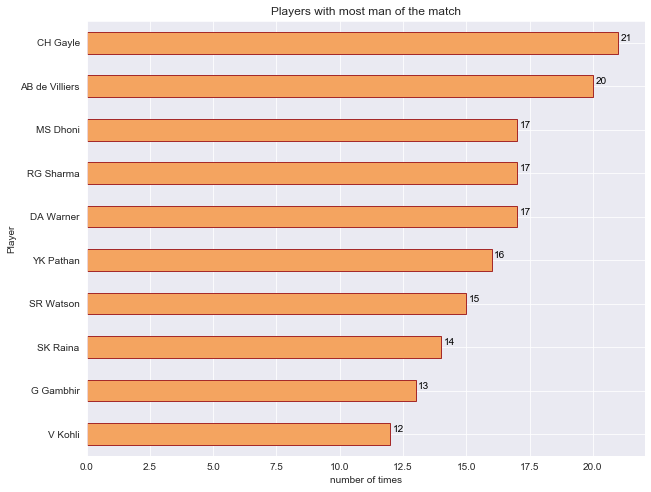

In [345]:
ax= df['player_of_match'].value_counts()[0:10].plot(kind ="barh" ,figsize =(10,8) ,color ="sandybrown", edgecolor ='brown')
plt.title("Players with most man of the match")
plt.ylabel("Player")
plt.xlabel("number of times")

#Annotation

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    
    ax.text(i.get_width()+.1, i.get_y()+.2, \
            str(round(i.get_width(), 2)), fontsize=10,color='black')

ax.invert_yaxis()


plt.grid(True)
plt.show()

In [346]:
# VISUALIZATION 3

# Find top 10 cities where maximum number of matches have taken place

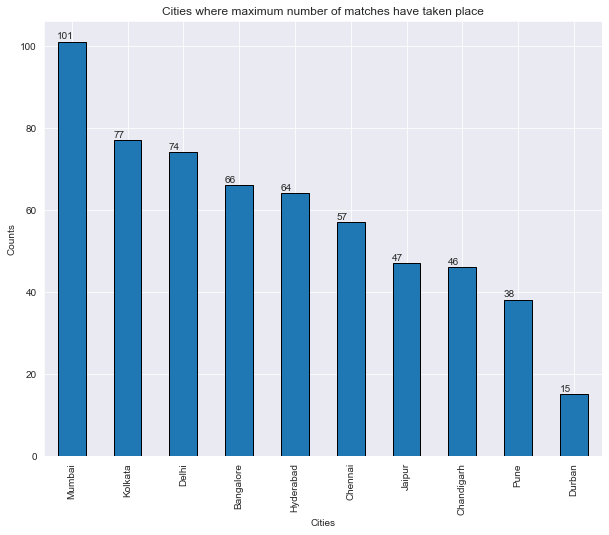

In [347]:
ax = df['city'].value_counts()[0:10].plot(kind ="bar" ,figsize =(10,8) ,edgecolor ='black')

plt.title("Cities where maximum number of matches have taken place")
plt.ylabel("Counts")
plt.xlabel("Cities")
total_list = []

for i in ax.patches:
    total_list.append(i.get_height())

for i in ax.patches:    
     
    ax.text(i.get_x()-.01, i.get_height()+.7, \
            str(round((i.get_height()),2)), fontsize=10)

plt.grid(True)
plt.show()

In [348]:
df1 = delivery[['batsman','batsman_runs','bowler']]
df1

,batsman,batsman_runs,bowler
0,DA Warner,0,TS Mills
1,DA Warner,0,TS Mills
2,DA Warner,4,TS Mills
3,DA Warner,0,TS Mills
4,DA Warner,0,TS Mills
...,...,...,...
179073,RA Jadeja,1,SL Malinga
179074,SR Watson,2,SL Malinga
179075,SR Watson,1,SL Malinga
179076,SN Thakur,2,SL Malinga


In [349]:
# VISUALIZATION 4

# Find out top 5 batsman with highest scores

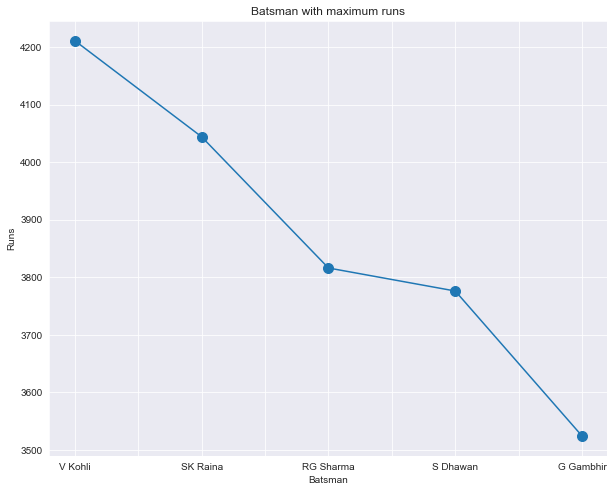

In [350]:

df1['batsman'].value_counts()[0:5].plot(kind ="line" ,figsize =(10,8), marker='o' ,markersize=10)
plt.title("Batsman with maximum runs")
plt.ylabel("Runs")
plt.xlabel("Batsman")
plt.grid(True)
plt.show()

In [351]:
# VISUALIZATION 5

# Find out top 5 bowlers with highest wicket takers

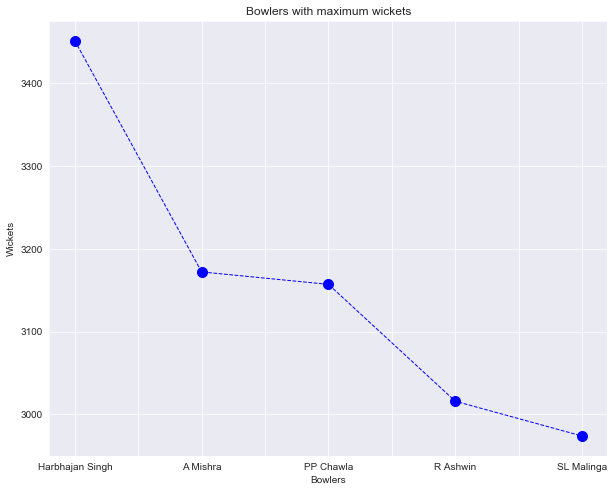

In [352]:
df1['bowler'].value_counts()[0:5].plot(kind ="line" ,figsize =(10,8), marker='o' ,markersize=10 ,color='blue',   
         linewidth=1.0,  
         linestyle='--' )
plt.title("Bowlers with maximum wickets")
plt.ylabel("Wickets")
plt.xlabel("Bowlers")
plt.grid(True)
plt.show()

In [353]:
# VISUALIZATION 6

# Which year hosted maximum IPL matches

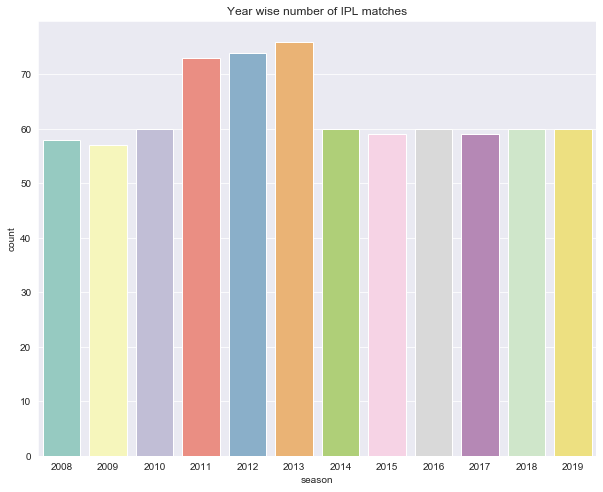

In [354]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10, 8))
plt.title("Year wise number of IPL matches")
ax = sns.countplot(x="season", data=matches ,palette="Set3")

# Summary from Visualization

# 1. From first visualization ,Team mumbai Indians won highest number of matches followed by Chennai Super kings.

# 2.From second visualization, Chris Gayle won maximum number of man of the match award.

# 3.From third visualization ,Mumbai hosted maximum number of IPL match followed ny Kolkata.

# 4.From fourth visualization,out of top 5 scorer batsbam, Virat Kohli scored maximum runs in IPL.

# 5.From fifth visualization , out of top 5 bowler ,Harbhajan Singh took maximum number of wickets in IPL.

# 6.From sixth visualization ,in 2013 ,maximum IPL matches took place followed by 2012 and 2011.